In [10]:
!pip install tensorflow matplotlib seaborn scikit-learn pillow numpy pandas


In [11]:
#import Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import (
    VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
)

from sklearn.metrics import classification_report, confusion_matrix


c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [12]:
#Path
train_dir = "dataset/train"
val_dir = "dataset/val"
test_dir = "dataset/test"

img_height, img_width = 224, 224
batch_size = 32


In [13]:
#Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [14]:
#CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

cnn_model.compile(
    optimizer=Adam(0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()


c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,499 (84.87 MB)

 Trainable params: 22,247,499 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Train CNN
cnn_history = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.3764 - loss: 1.7591 - val_accuracy: 0.6346 - val_loss: 1.2572
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.5566 - loss: 1.3000 - val_accuracy: 0.7106 - val_loss: 0.9530
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.6485 - loss: 1.0432 - val_accuracy: 0.7610 - val_loss: 0.7478
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.7141 - loss: 0.8498 - val_accuracy: 0.8352 - val_loss: 0.5952
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.7561 - loss: 0.7291 - val_accuracy: 0.7885 - val_loss: 0.5944
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.7806 - loss: 0.6478 - val_accuracy: 0.8755 - val_loss: 0.4449
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8151 - loss: 0.5622 - val_accuracy: 0.8910 - val_loss: 0.3819
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8275 - loss: 0.5055 - val_accu

In [ ]:
#Transfer learning - model builder
def build_transfer_model(base_model):
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [19]:
#Train pre-trained models
models = {
    "VGG16": VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)),
    "ResNet50": ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3)),
    "MobileNet": MobileNet(weights="imagenet", include_top=False, input_shape=(224,224,3)),
    "InceptionV3": InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3)),
    "EfficientNetB0": EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
}

history_dict = {}
accuracy_scores = {}

for name, base in models.items():
    print(f"\nTraining {name}")
    model = build_transfer_model(base)
    history = model.fit(train_gen, validation_data=val_gen, epochs=2)
    history_dict[name] = history

    val_acc = history.history["val_accuracy"][-1]
    accuracy_scores[name] = val_acc



Training VGG16
Epoch 1/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 1905s 10s/step - accuracy: 0.6106 - loss: 1.2049 - val_accuracy: 0.8919 - val_loss: 0.5146
Epoch 2/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 1813s 9s/step - accuracy: 0.8443 - loss: 0.5519 - val_accuracy: 0.9414 - val_loss: 0.2936

Training ResNet50
Epoch 1/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 952s 5s/step - accuracy: 0.1629 - loss: 2.3646 - val_accuracy: 0.1712 - val_loss: 2.2459
Epoch 2/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 864s 4s/step - accuracy: 0.1712 - loss: 2.2644 - val_accuracy: 0.1712 - val_loss: 2.2008

Training MobileNet
Epoch 1/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.7990 - loss: 0.7136 - val_accuracy: 0.9780 - val_loss: 0.0861
Epoch 2/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.9351 - loss: 0.1961 - val_accuracy: 0.9863 - val_loss: 0.0452

Training InceptionV3
Epoch 1/2
195/195 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.7373 - loss: 0.8713 - val_accuracy: 0.9222 - val_loss: 0.2387
Epoch 2/2
195/195 ━━━━━━

In [20]:
#Model Comparison
accuracy_df = pd.DataFrame.from_dict(
    accuracy_scores, orient="index", columns=["Validation Accuracy"]
)

accuracy_df.sort_values(by="Validation Accuracy", ascending=False)


,Validation Accuracy
MobileNet,0.986264
InceptionV3,0.957875
VGG16,0.941392
ResNet50,0.171245
EfficientNetB0,0.088828


100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 405ms/step


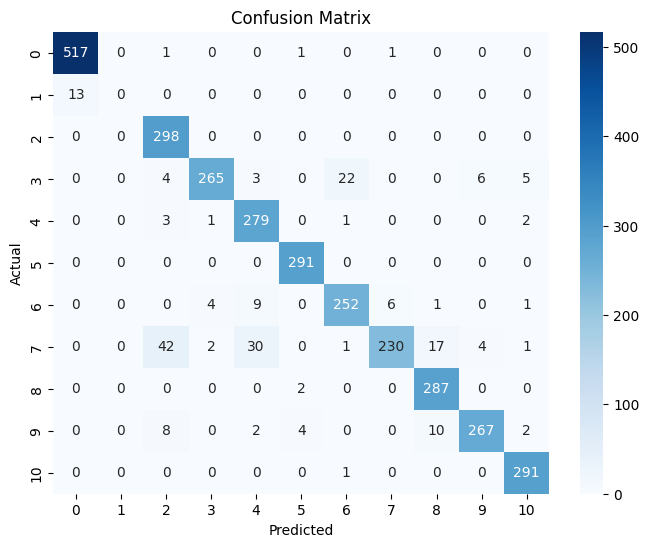

                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.84      1.00      0.91       298
   fish sea_food gilt_head_bream       0.97      0.87      0.92       305
   fish sea_food hourse_mackerel       0.86      0.98      0.92       286
        fish sea_food red_mullet       0.98      1.00      0.99       291
     fish sea_food red_sea_bream       0.91      0.92      0.92       273
          fish sea_food sea_bass       0.97      0.70      0.82       327
            fish sea_food shrimp       0.91      0.99      0.95       289
fish sea_food striped_red_mullet       0.96      0.91      0.94       293
             fish sea_food trout       0.96      1.00      0.98       292

                        accuracy                           0.93      3187
                       macro avg    

c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [21]:
#Evaluation Confusion Matrix
best_model = cnn_model
test_preds = best_model.predict(test_gen)
y_pred = np.argmax(test_preds, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))


In [ ]:
#Save best model
best_model.save("fish_classification_best_model.h5")
print("best fishc;assification model saved")

NameError: name 'best_model' is not defined

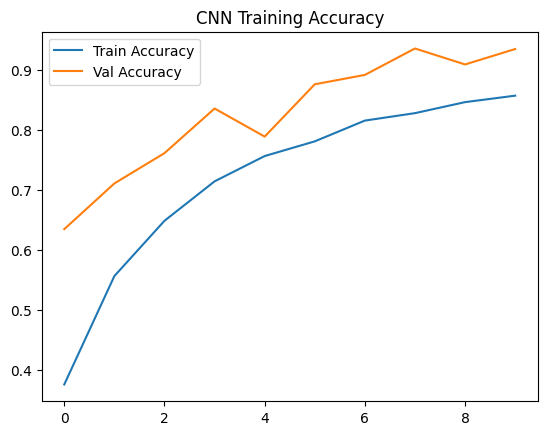

In [24]:
#Training History Visualization
plt.plot(cnn_history.history["accuracy"], label="Train Accuracy")
plt.plot(cnn_history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("CNN Training Accuracy")
plt.show()
